Add necessary files for notebook from github rep

In [1]:
!git clone https://github.com/haleycab/murray-neuroscience-lab

Cloning into 'murray-neuroscience-lab'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 4), reused 22 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 11.65 MiB | 8.46 MiB/s, done.
Resolving deltas: 100% (4/4), done.


Import share drive files

Notebook to process abf files into dictionaries with waveforms

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyabf

Code to process excel spreadsheet into readable data frame with 'Trace name' as the index. Just download csv tab from spreadsheet and run

In [2]:
trace_names = pd.read_csv("/Users/Haley/Desktop/Neuroscience Lab/Repository/murray-neuroscience-lab/Excel processor/abf_trace_names.csv")
trace_names = trace_names["filename"].to_numpy()
trace_names

array(['2012_04_25_0004.abf', '2012_04_25_0005.abf',
       '2012_04_25_0006.abf', ..., '2013_03_22_0060.abf',
       '2013_03_22_0061.abf', '2012_10_04_0014.abf'],
      shape=(158,), dtype=object)

# Import csvs loop and create columns based on cell-type:

# Import the csv as a data frame


In [3]:
df = pd.read_csv("/Users/Haley/Desktop/Neuroscience Lab/Repository/murray-neuroscience-lab/Processed CSVs/2012_08_01_cell1.csv")
df[["Trace name","Tags","Type"]] = df[["Trace name","Tags","Type"]].astype("string")
df


,Trace name,ID,On time,Freq,Tags,Type,Seconds
0,2012_08_01_0009,1,2304.81,NaN,bout start; shock,Inhibitory,2.30481
1,2012_08_01_0009,2,2332.90,35.5999,<NA>,Inhibitory,2.33290
2,2012_08_01_0009,3,2353.79,47.8698,<NA>,Inhibitory,2.35379
3,2012_08_01_0009,4,2384.38,32.6904,<NA>,Inhibitory,2.38438
4,2012_08_01_0009,5,2422.12,26.4971,<NA>,Inhibitory,2.42212
...,...,...,...,...,...,...,...
563,2012_08_01_0003,62,8731.18,5.1261,bout start; spontaneous,Cell-attached,8.73118
564,2012_08_01_0003,63,8767.38,27.6243,<NA>,Cell-attached,8.76738
565,2012_08_01_0003,64,8806.48,25.5754,<NA>,Cell-attached,8.80648
566,2012_08_01_0003,65,8853.77,21.1461,<NA>,Cell-attached,8.85377


In [28]:
import pyabf

Make a list of traces

In [4]:
traces = df["Trace name"].unique().tolist() # Make a list of all the traces in the csv
type(traces)

list

File path load test

In [5]:
abf = pyabf.ABF("/Users/Haley/Downloads/.abf files annotated/"+traces[0]+".abf")
abf
# filepath = "/Users/Haley/Downloads/.abf files annotated/2012_08_01_0009.abf"

ABF (v2.0) with 4 channels (pA, mV, mV, V), sampled at 100.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "Ch1PatchCh2Root_SK". path=/Users/Haley/Downloads/.abf files annotated/2012_08_01_0009.abf

# Load the abfs from the traces list of the csv file into a dict

In [6]:
abfs = {}

for trace in traces:
    abfs[trace] = []
    file_path2 = "/Users/Haley/Downloads/.abf files annotated/" + trace +".abf"
    abf = pyabf.ABF(file_path2)
    abfs[trace]= abf

In [7]:
abfs

{'2012_08_01_0009': ABF (v2.0) with 4 channels (pA, mV, mV, V), sampled at 100.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "Ch1PatchCh2Root_SK". path=/Users/Haley/Downloads/.abf files annotated/2012_08_01_0009.abf,
 '2012_08_01_0010': ABF (v2.0) with 4 channels (pA, mV, mV, V), sampled at 100.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "Ch1PatchCh2Root_SK". path=/Users/Haley/Downloads/.abf files annotated/2012_08_01_0010.abf,
 '2012_08_01_0011': ABF (v2.0) with 4 channels (pA, mV, mV, V), sampled at 100.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "Ch1PatchCh2Root_SK". path=/Users/Haley/Downloads/.abf files annotated/2012_08_01_0011.abf,
 '2012_08_01_0005': ABF (v2.0) with 4 channels (pA, mV, mV, V), sampled at 100.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with proto

So now, I have taken on csv file, made a list of the traces in the file, then created a loop to load the abfs from that trace into a dict

Get annotations for specific trace

In [8]:
annotation_df = df[df["Trace name"] == "2012_08_01_0003"]
annotation_df.reset_index()
annotation_df

,Trace name,ID,On time,Freq,Tags,Type,Seconds
502,2012_08_01_0003,1,2178.43,NaN,bout start; shock,Cell-attached,2.17843
503,2012_08_01_0003,2,2206.28,35.9066,<NA>,Cell-attached,2.20628
504,2012_08_01_0003,3,2241.85,28.1136,<NA>,Cell-attached,2.24185
505,2012_08_01_0003,4,2287.47,21.9202,<NA>,Cell-attached,2.28747
506,2012_08_01_0003,5,2326.33,25.7334,<NA>,Cell-attached,2.32633
...,...,...,...,...,...,...,...
563,2012_08_01_0003,62,8731.18,5.1261,bout start; spontaneous,Cell-attached,8.73118
564,2012_08_01_0003,63,8767.38,27.6243,<NA>,Cell-attached,8.76738
565,2012_08_01_0003,64,8806.48,25.5754,<NA>,Cell-attached,8.80648
566,2012_08_01_0003,65,8853.77,21.1461,<NA>,Cell-attached,8.85377


In [62]:
print(annotation_df.loc[502, 'Seconds'])
print(df.iloc[0][6],df.iloc[1][6])



2.17843
2.30481 2.3329


/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_28098/2772821486.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.iloc[0][6],df.iloc[1][6])


In [92]:
annotation_df

,Trace name,ID,On time,Freq,Tags,Type,Seconds
502,2012_08_01_0003,1,2178.43,NaN,bout start; shock,Cell-attached,2.17843
503,2012_08_01_0003,2,2206.28,35.9066,<NA>,Cell-attached,2.20628
504,2012_08_01_0003,3,2241.85,28.1136,<NA>,Cell-attached,2.24185
505,2012_08_01_0003,4,2287.47,21.9202,<NA>,Cell-attached,2.28747
506,2012_08_01_0003,5,2326.33,25.7334,<NA>,Cell-attached,2.32633
...,...,...,...,...,...,...,...
563,2012_08_01_0003,62,8731.18,5.1261,bout start; spontaneous,Cell-attached,8.73118
564,2012_08_01_0003,63,8767.38,27.6243,<NA>,Cell-attached,8.76738
565,2012_08_01_0003,64,8806.48,25.5754,<NA>,Cell-attached,8.80648
566,2012_08_01_0003,65,8853.77,21.1461,<NA>,Cell-attached,8.85377


In [103]:
t_0 = annotation_df.iloc[0,6]
t_f = annotation_df.iloc[1,6]
print(t_0,t_f)
# print(annotation_df.iloc[0][6],annotation_df.iloc[1][6])
# phase_0 = int(t_0 * 100000)
# phase_1 = int(t_f * 100000)
# abf_waveform = df.loc[phase_0:phase_1]
# abf_waveform
# type(phase_0)

2.17843 2.2062800000000005


NEED TO UNWRITE TYPE 

In [113]:
freq = 1 / (t_f-t_0)
signal_type = annotation_df.iloc[0,5]
key = (freq,type)
key

(np.float64(35.906642728904366), 'Cell-attached')

Get abf of trace

In [73]:
abf = abfs["2012_08_01_0003"]
abf.setSweep(sweepNumber=0, channel=0)
x = abf.sweepX
y = abf.sweepY
abf_df = pd.DataFrame({
    'Time': x,
    'Current': y
})
phase_0 = int(t_0 * 100000)
phase_1 = int(t_f * 100000)
abf_waveform = abf_df.loc[phase_0:phase_1]
abf_waveform

,Time,Current
246240,2.46240,-9.277343
246241,2.46241,-8.544921
246242,2.46242,-7.324218
246243,2.46243,-5.737304
246244,2.46244,-4.760742
...,...,...
250124,2.50124,-5.126953
250125,2.50125,-4.516601
250126,2.50126,-4.882812
250127,2.50127,-5.859375


In [ ]:
def make_waveforms(abf,df):
    '''
    Function that takes an abf file and a df of the annotations
    Returns a dictionary with waveforms labeled by their frequency
    '''
    abf.setSweep(sweepNumber=0, channel=0)
    x = abf.sweepX
    y = abf.sweepY
    abf_df = pd.DataFrame({
        'Time': x,
        'Current': y
    })
    # df["On time"] = pd.to_numeric(df["On time"], errors="coerce")
    # df["Seconds"] = df['On time']*0.001
    waveforms = {}
    for i in range(len(df) - 1):
        t_0 = df.iloc[i,6] 
        t_f = df.iloc[i+1,6]
        phase_0 = int(t_0 * 100000)
        phase_1 = int(t_f * 100000)
        abf_waveform = abf_df.loc[phase_0:phase_1]
        phase = (abf_waveform["Time"] - t_0) / (t_f - t_0)
        abf_waveform["Phase"] = phase
        
        # NEED TO NORMALIZE CURRENT ALSO

        freq = 1 / (t_f-t_0) # CHECK = df.loc[i + 1, "Freq"]
        waveforms[freq] = abf_waveform

    return waveforms

Function that splits abf df into dictionary with each waveworm, just load abf file and then pass cleaned df that goes with abf file

In [12]:
def make_waveforms(abf,df):
    '''
    Function that takes an abf file and a df of the annotations
    Returns a dictionary with waveforms labeled by their frequency
    '''
    abf.setSweep(sweepNumber=0, channel=0)
    x = abf.sweepX
    y = abf.sweepY
    abf_df = pd.DataFrame({
        'Time': x,
        'Current': y
    })
    # df["On time"] = pd.to_numeric(df["On time"], errors="coerce")
    # df["Seconds"] = df['On time']*0.001
    waveforms = {}
    for i in range(len(df) - 1):
        t_0 = df.iloc[i,6] 
        t_f = df.iloc[i+1,6]
        phase_0 = int(t_0 * 100000)
        phase_1 = int(t_f * 100000)
        abf_waveform = abf_df.loc[phase_0:phase_1]
        phase = (abf_waveform["Time"] - t_0) / (t_f - t_0)
        abf_waveform["Phase"] = phase
        
        # NORMALIZE CURRENT ALSO, test this:
        y_max = max(abf_waveform["Current"])
        y_min = min(abf_waveform["Current"])
        normalized = (abf_waveform["Current"] - y_min) / (y_max - y_min)
        abf_waveform["Normalized Current"] = normalized
        #=====

        # Dict keys
        freq = 1 / (t_f-t_0) # CHECK = df.loc[i + 1, "Freq"]
        # cell_type = df.iloc[0,5]
        # signal_type = df.iloc[0,7]
        # fast_slow = df.iloc[0,9] # 8:resistance 9:prim/sec low/high rin need to see what is fast/slow
        key = freq #,cell_type,signal_type,fast_slow)
        waveforms[key] = abf_waveform

    return waveforms

In [14]:
annotation_df

,Trace name,ID,On time,Freq,Tags,Type,Seconds
502,2012_08_01_0003,1,2178.43,NaN,bout start; shock,Cell-attached,2.17843
503,2012_08_01_0003,2,2206.28,35.9066,<NA>,Cell-attached,2.20628
504,2012_08_01_0003,3,2241.85,28.1136,<NA>,Cell-attached,2.24185
505,2012_08_01_0003,4,2287.47,21.9202,<NA>,Cell-attached,2.28747
506,2012_08_01_0003,5,2326.33,25.7334,<NA>,Cell-attached,2.32633
...,...,...,...,...,...,...,...
563,2012_08_01_0003,62,8731.18,5.1261,bout start; spontaneous,Cell-attached,8.73118
564,2012_08_01_0003,63,8767.38,27.6243,<NA>,Cell-attached,8.76738
565,2012_08_01_0003,64,8806.48,25.5754,<NA>,Cell-attached,8.80648
566,2012_08_01_0003,65,8853.77,21.1461,<NA>,Cell-attached,8.85377


In [13]:
make_waveforms(abf,annotation_df)

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_84953/464373908.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abf_waveform["Phase"] = phase
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_84953/464373908.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abf_waveform["Normalized Current"] = normalized
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_84953/464373908.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

{np.float64(35.906642728904366):            Time   Current     Phase  Normalized Current
 217843  2.17843 -4.882812  0.000000            0.775000
 217844  2.17844 -4.516601  0.000359            0.787500
 217845  2.17845 -4.394531  0.000718            0.791667
 217846  2.17846 -4.638671  0.001077            0.783333
 217847  2.17847 -4.760742  0.001436            0.779167
 ...         ...       ...       ...                 ...
 220624  2.20624 -6.347656  0.998564            0.725000
 220625  2.20625 -6.103515  0.998923            0.733333
 220626  2.20626 -5.859375  0.999282            0.741667
 220627  2.20627 -5.615234  0.999641            0.750000
 220628  2.20628 -5.371093  1.000000            0.758333
 
 [2786 rows x 4 columns],
 np.float64(28.113578858589143):            Time   Current         Phase  Normalized Current
 220628  2.20628 -5.371093 -1.248494e-14            0.682819
 220629  2.20629 -5.249023  2.811358e-04            0.687225
 220630  2.20630 -6.103515  5.622716e-04 

Load abf file and see what it looks like

In [37]:
abf = pyabf.ABF('/Users/Haley/Desktop/Neuroscience Lab/sandeeps data/cell1/2012_04_25_0001.abf')

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_26252/2682415171.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


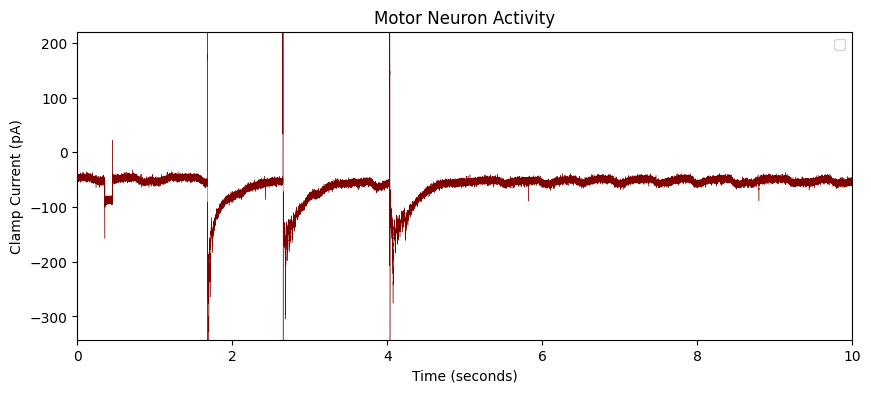

In [38]:
def get_std_range(array, stdnum=8):
    """
    Returns the lower and upper bounds of a region centered at the mean
    that contains the given percentage of the data, assuming a normal distribution.

    Returns:
    - (lower_bound, upper_bound)
    """
    mean = np.mean(array)
    std = np.std(array)

    lower = mean - stdnum * std
    upper = mean + stdnum * std
    return lower, upper

def plot_motorneuron_activity(abf):
    fig = plt.figure(figsize=(10, 4))
    # plot the first channel
    abf.setSweep(sweepNumber=0, channel=0)
    plt.plot(abf.sweepX, abf.sweepY,linewidth = 0.3,color='maroon')
    y_min, y_max = get_std_range(abf.sweepY,10)

    # decorate the plot
    plt.title("Motor Neuron Activity")
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    plt.axis([0, 10, y_min, y_max]) # x bound, y bound
    plt.legend()
    plt.show()

plot_motorneuron_activity(abf)

Make dictionary with annotations file and abf

In [114]:
dict = make_waveforms(abf, annotation_df)



/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_28098/3448508806.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abf_waveform["Phase"] = phase
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_28098/3448508806.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abf_waveform["Phase"] = phase
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_28098/3448508806.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Waveforms labeled by frequency:

In [115]:
dict.keys()

dict_keys([np.float64(35.906642728904366), np.float64(28.113578858589143), np.float64(21.92021043402017), np.float64(25.733401955738472), np.float64(23.068050749711766), np.float64(24.51581269919105), np.float64(23.073373327180352), np.float64(20.445716622367517), np.float64(20.69964810598207), np.float64(21.123785382340643), np.float64(27.43484224965683), np.float64(22.914757103574754), np.float64(21.1954217888938), np.float64(2.222172840603541), np.float64(35.68879371877267), np.float64(22.492127755285452), np.float64(24.36053593179061), np.float64(23.579344494222905), np.float64(22.558087074216118), np.float64(21.720243266724758), np.float64(23.14279102059698), np.float64(22.522522522522525), np.float64(18.857250612860597), np.float64(22.85191956124325), np.float64(1.0194615204249113), np.float64(25.40650406504047), np.float64(28.686173264487156), np.float64(24.06159769008634), np.float64(21.39495079161328), np.float64(21.687269572760954), np.float64(23.90628735357397), np.float64(2

Get one wave using key

In [117]:
onewave = dict[np.float64(35.906642728904366)]
print(onewave)

           Time   Current     Phase
217843  2.17843 -4.882812  0.000000
217844  2.17844 -4.516601  0.000359
217845  2.17845 -4.394531  0.000718
217846  2.17846 -4.638671  0.001077
217847  2.17847 -4.760742  0.001436
...         ...       ...       ...
220624  2.20624 -6.347656  0.998564
220625  2.20625 -6.103515  0.998923
220626  2.20626 -5.859375  0.999282
220627  2.20627 -5.615234  0.999641
220628  2.20628 -5.371093  1.000000

[2786 rows x 3 columns]


Bin data

In [119]:
def bin_wave(onewave):
    # Make edges for the bin
    bins = np.linspace(0, 1, 51, endpoint = True)
    # print(bins)

    # Cut the phase into bins
    onewave['Phase Bin'] = pd.cut(onewave['Phase'], bins=bins, include_lowest=True)
    # print(onewave)

    # Group by the bins and calculate the average current
    # binned_avg = onewave.groupby(by='Phase Bin','Current')
    binned_avg = onewave.groupby('Phase Bin')['Current'].mean().reset_index()
    # print(binned_avg)

    # Get phase column for plotting (middle of bin)
    phase = np.arange(0.01, 1.00001, 0.02)
    # len(phase)
    binned_avg['Phase'] = phase
    return binned_avg

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_28098/156327862.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = onewave.groupby('Phase Bin')['Current'].mean().reset_index()


,Phase Bin,Current,Phase
0,"(-0.001, 0.02]",-5.619594,0.01
1,"(0.02, 0.04]",-6.389072,0.03
2,"(0.04, 0.06]",-5.948747,0.05
3,"(0.06, 0.08]",-6.820401,0.07
4,"(0.08, 0.1]",-6.116594,0.09
5,"(0.1, 0.12]",-7.071358,0.11
6,"(0.12, 0.14]",-6.447531,0.13
7,"(0.14, 0.16]",-6.977626,0.15
8,"(0.16, 0.18]",-5.118233,0.17
9,"(0.18, 0.2]",-6.025041,0.19


/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_28098/156327862.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = onewave.groupby('Phase Bin')['Current'].mean().reset_index()


<Axes: xlabel='Phase'>

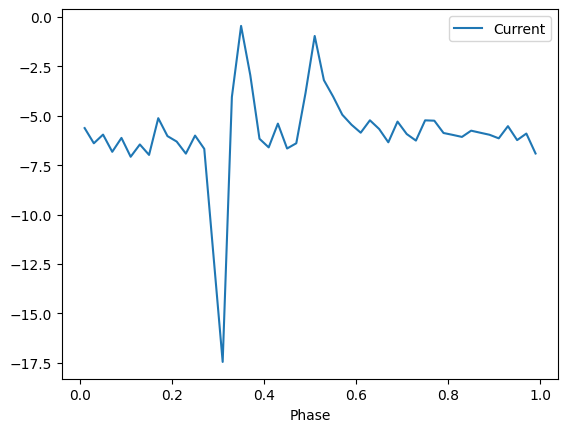

In [124]:
bin_table = bin_wave(onewave)
bin_table.plot("Phase","Current")

In [122]:
plt.plot()

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_28098/1110072373.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = onewave.groupby('Phase Bin')['Current'].mean().reset_index()


,Phase Bin,Current
0,"(-0.001, 0.02]",-5.619594
1,"(0.02, 0.04]",-6.389072
2,"(0.04, 0.06]",-5.948747
3,"(0.06, 0.08]",-6.820401
4,"(0.08, 0.1]",-6.116594
5,"(0.1, 0.12]",-7.071358
6,"(0.12, 0.14]",-6.447531
7,"(0.14, 0.16]",-6.977626
8,"(0.16, 0.18]",-5.118233
9,"(0.18, 0.2]",-6.025041


Plot the waveform"

In [121]:
binned_avg.plot('Phase','Current',kind = 'line')

KeyError: 'Phase'